In [1]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller

Plotting the default dataset

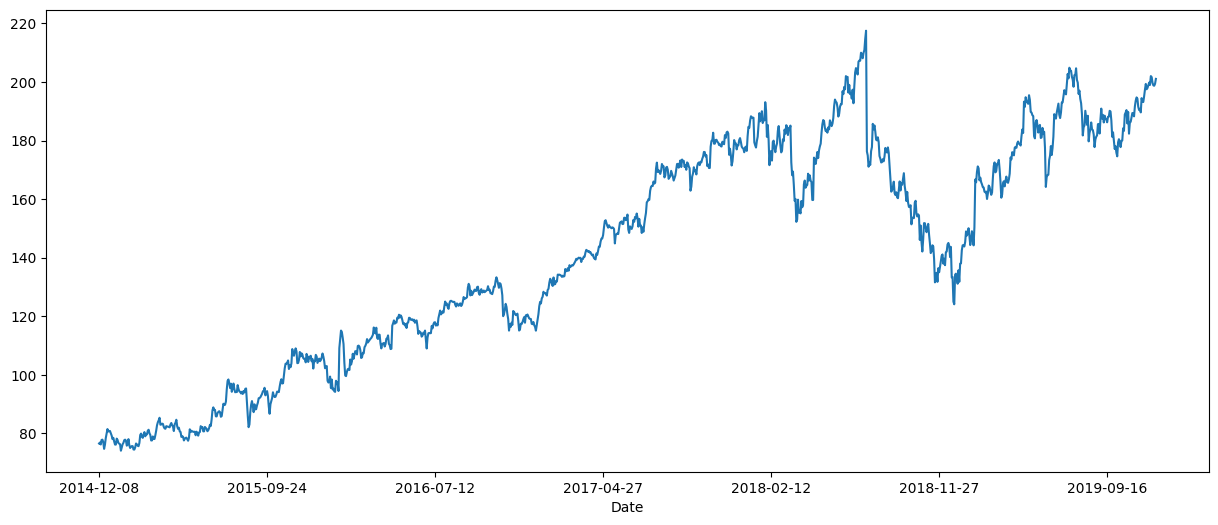

In [2]:
series = pd.read_csv('FB.csv', header=0, index_col=0)
series['Close'].plot(figsize=(15,6))
pyplot.show()

Note: We can see that the data is not stationary due to the varying mean and varying variance of the dataset...hence we need to make the data stationary. But to be sure that the data is not stationary we need to find the value of unit roots in the dataset.

CREATING A FUNCTION TO PERFORM THE AUGMENTED DICKEY FULLER TEST

In [3]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='t-stat')

    dfoutput = pd.Series(dftest[0:4], index=['','','',''])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05 :
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

**PERFORMING THE ADF TEST ON THE 'Close' COLUMN OF THE DATASET**

In [4]:
Augmented_Dickey_Fuller_Test_func(series['Close'],'Close')

Results of Dickey-Fuller Test for column: Close
                          -1.174283
                           0.684560
                          20.000000
                        1238.000000
Critical Value (1%)       -3.435643
Critical Value (5%)       -2.863877
Critical Value (10%)      -2.568014
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


**MAKING THE 'Close' COLUMN OF THE DATASET AS STATIONARY BY USING FIRST DIFFERENCE**

<Axes: xlabel='Date'>

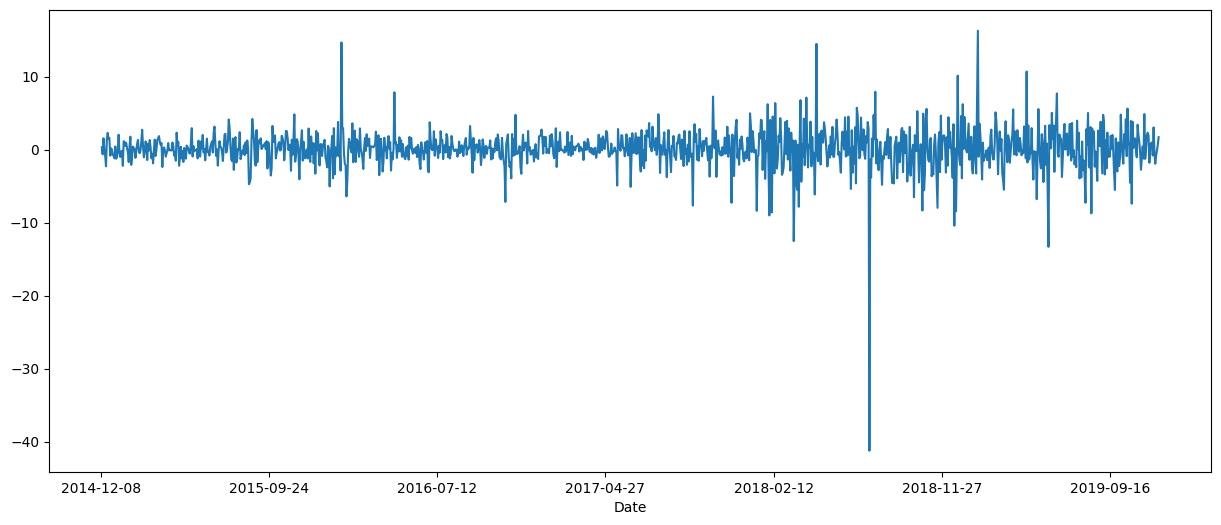

In [5]:
diff_series=series['Close'].diff().plot(figsize=(15,6))
diff_series

**PERFORMING ADF TEST ON THE STATIONARY DATASET**

In [6]:
Augmented_Dickey_Fuller_Test_func(series['Close'].diff().dropna(),'Close')

Results of Dickey-Fuller Test for column: Close
                       -7.718742e+00
                        1.208460e-11
                        1.900000e+01
                        1.238000e+03
Critical Value (1%)    -3.435643e+00
Critical Value (5%)    -2.863877e+00
Critical Value (10%)   -2.568014e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


CONCLUSION: The dataset after applying the first differnce is now stationary and ready to be modelled
